In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from tqdm import tqdm
%matplotlib inline

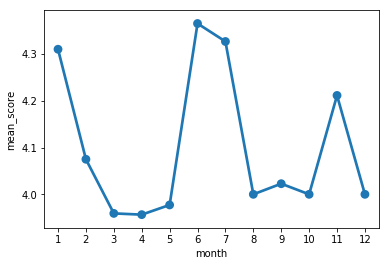

In [2]:
reviews = pd.read_html('mon_reviews.html', header=0)[0]
# stars = reviews[['date', 'stars']].sort_values(by=['date'])
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['year'], reviews['month'] = reviews['date'].dt.year, reviews['date'].dt.month
reviews = reviews[reviews['year']==2017]
mean_stars = reviews.groupby(['year', 'month'], as_index=False)['stars'].agg({"mean_score": "mean"})
ax = sns.pointplot(x='month', y='mean_score', data=mean_stars)

In [3]:
#list(reviews['user_id'])

In [4]:
# reviews = pd.read_html('gordon_reviews.html', header=0)[0]
# stars = reviews[['date', 'stars']].sort_values(by=['date'])
# stars['date'] = pd.to_datetime(stars['date'])
# stars['year'], stars['month'] = stars['date'].dt.year, stars['date'].dt.month
# stars = stars[stars['year']>=2015]
# mean_stars = stars.groupby(['year', 'month'], as_index=False)['stars'].agg({"mean_score": "mean"})
# ax = sns.pointplot(x='month', y='mean_score', hue='year', data=mean_stars)

In [5]:
low_reviews = reviews[(reviews['year']==2017) & (reviews['month'].isin([3,4,5]))]
low_reviews.head()

,id,business_id,user_id,stars,date,text,useful,funny,cool,year,month
19,-BapNk1B4IuTDZUxKdbYnQ,4JNXUYY8wbaaDmk3BPzlWw,EMMKdK1cGrLSo08wgSYHJQ,3,2017-04-19,As much as people I know have raved about thei...,2,0,0,2017,4
58,-tRXFjeMjpX7qAv1_EcT7g,4JNXUYY8wbaaDmk3BPzlWw,SRMOslD85xkPQzfMIUsQNQ,2,2017-04-23,We are here on a Saturday night. The atmospher...,0,0,0,2017,4
71,-YPzsFf8dzmVTRwekNnFDA,4JNXUYY8wbaaDmk3BPzlWw,WgRKynZBQSdrSYOCAf3JXg,2,2017-05-14,First had reservations and still had to wait 3...,0,0,0,2017,5
100,0cUaPoyrcyf-GDukR75pbQ,4JNXUYY8wbaaDmk3BPzlWw,j5ezF5mEGpnDwdTmAHci7Q,4,2017-03-07,If you've been to Paris... this is a poor subs...,0,0,0,2017,3
103,0dw964e_pXFfGMLuvQZ7zA,4JNXUYY8wbaaDmk3BPzlWw,PXPs4ZY7c77MejUVv6MLVw,5,2017-03-17,Mon Ami Gabi has been a must-stop breakfast sp...,0,0,0,2017,3


In [7]:
list(low_reviews['user_id'])[:5]

['EMMKdK1cGrLSo08wgSYHJQ',
 'SRMOslD85xkPQzfMIUsQNQ',
 'WgRKynZBQSdrSYOCAf3JXg',
 'j5ezF5mEGpnDwdTmAHci7Q',
 'PXPs4ZY7c77MejUVv6MLVw']

In [8]:
mon_users = pd.read_csv('mon_users.csv')
mon_users.head()

,id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,--8ELb8W1afbyP21EZStPg,Mi Sou,20,2011-10-25 00:00:00,0,0,0,0,4.13,0,0,0,0,0,0,0,1,1,0,0
1,-0tLDaIzN1Gbxc51Bxad4A,Rana,33,2013-05-14 00:00:00,4,0,0,0,3.35,0,0,0,0,0,0,0,0,0,0,0
2,-9ZFoRZpBAsf1ckY3aeyrg,Alexandra,91,2013-01-14 00:00:00,5,0,1,2,3.88,1,1,0,0,0,1,5,5,5,5,0
3,-9_Nz6wJ9Rj0q7kq6YJ-MA,Olga,125,2013-05-26 00:00:00,4,0,6,5,3.97,5,0,0,0,0,1,2,10,10,2,2
4,-AkgXdzDcdEvyXgKYJQW4w,Karli,322,2013-01-09 00:00:00,2,2,2,15,4.05,7,0,0,2,0,1,9,7,7,6,5


In [10]:
users = mon_users.drop(['id', 'name', 'yelping_since'], axis=1)
users.head()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,20,0,0,0,0,4.13,0,0,0,0,0,0,0,1,1,0,0
1,33,4,0,0,0,3.35,0,0,0,0,0,0,0,0,0,0,0
2,91,5,0,1,2,3.88,1,1,0,0,0,1,5,5,5,5,0
3,125,4,0,6,5,3.97,5,0,0,0,0,1,2,10,10,2,2
4,322,2,2,2,15,4.05,7,0,0,2,0,1,9,7,7,6,5


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

x = users.values
scaler = StandardScaler()
x = scaler.fit_transform(x)
kmeans = KMeans(n_clusters=2, random_state=1).fit(x)
pred = kmeans.predict(x)
np.where(pred>0)

(array([197, 311, 489]),)

In [12]:
#DBSCAN
dbscan = DBSCAN(eps=2)
pred = dbscan.fit_predict(x)
influencers = np.where(pred==-1)[0]
influencers

array([  9,  15,  54,  87, 119, 156, 177, 197, 214, 259, 296, 302, 311,
       330, 333, 335, 368, 429, 489, 559, 562, 573])

In [13]:
influ = list(mon_users.iloc[influencers, :]['id'])

In [14]:
reviews.head()

,id,business_id,user_id,stars,date,text,useful,funny,cool,year,month
19,-BapNk1B4IuTDZUxKdbYnQ,4JNXUYY8wbaaDmk3BPzlWw,EMMKdK1cGrLSo08wgSYHJQ,3,2017-04-19,As much as people I know have raved about thei...,2,0,0,2017,4
44,-Lk8DRj59iWk09iXGugSmA,4JNXUYY8wbaaDmk3BPzlWw,q3eLont3I-8fBKbekmX_xg,5,2017-10-14,"Love, love, love this place! We go every time ...",0,0,0,2017,10
47,-NQ4dmUjBjpauRmydtROHg,4JNXUYY8wbaaDmk3BPzlWw,EK8lYaib-nW6RH1VxapA-g,5,2017-01-30,Gotta hand it to them.. They get packed but ca...,0,0,0,2017,1
58,-tRXFjeMjpX7qAv1_EcT7g,4JNXUYY8wbaaDmk3BPzlWw,SRMOslD85xkPQzfMIUsQNQ,2,2017-04-23,We are here on a Saturday night. The atmospher...,0,0,0,2017,4
71,-YPzsFf8dzmVTRwekNnFDA,4JNXUYY8wbaaDmk3BPzlWw,WgRKynZBQSdrSYOCAf3JXg,2,2017-05-14,First had reservations and still had to wait 3...,0,0,0,2017,5


In [15]:
reviews[(reviews['month'].isin([8,9,10])) & (reviews['year']==2017)].groupby("stars").count()

,id,business_id,user_id,date,text,useful,funny,cool,year,month
stars,,,,,,,,,,
1,5,5,5,5,5,5,5,5,5,5
2,13,13,13,13,13,13,13,13,13,13
3,22,22,22,22,22,22,22,22,22,22
4,43,43,43,43,43,43,43,43,43,43
5,64,64,64,64,64,64,64,64,64,64


In [16]:
reviews[(reviews['month'].isin([6,7])) & (reviews['year']==2017)].groupby("stars").count()

,id,business_id,user_id,date,text,useful,funny,cool,year,month
stars,,,,,,,,,,
1,4,4,4,4,4,4,4,4,4,4
2,2,2,2,2,2,2,2,2,2,2
3,6,6,6,6,6,6,6,6,6,6
4,34,34,34,34,34,34,34,34,34,34
5,58,58,58,58,58,58,58,58,58,58


In [52]:
#reading reviews files for all 5 top restaurants
files = glob.glob('*.html')
df = pd.DataFrame()
for file in tqdm(files):
    reviews = pd.read_html(file, header=0)[0]
    if df.shape[0] == 0:
        df = reviews
    else:
        df = df.append(reviews)

100%|██████████| 5/5 [01:01<00:00, 12.36s/it]


In [53]:
df.shape

(22671, 9)

In [19]:
df.head()

,id,business_id,user_id,stars,date,text,useful,funny,cool
0,--1h6ROOo2XEsLQK8uKvaQ,RESDUcs7fIiihp38-d6_6g,2rMCI2OU7ZIusbjnXGomdQ,4,2016-02-14 00:00:00,Mind you the wait time could be loooong! So br...,0,0,0
1,-28T41kjGIKfapLuPvS9Ow,RESDUcs7fIiihp38-d6_6g,QVrLRR_Q-gPq4EinMochpw,5,2015-02-12 00:00:00,Best in Las Vegas for a reason. Bacchanal seem...,0,0,0
2,-3EMV8zNQvOuWMjlddQeIQ,RESDUcs7fIiihp38-d6_6g,6HWYZmkibLA935-p3ACkRQ,1,2016-07-09 00:00:00,Wow! It was a huge disappointing experience at...,0,1,0
3,-3RQaujJxVDppbCWVLiJog,RESDUcs7fIiihp38-d6_6g,mC-Nq-FfHJb-8OTWOh0pxw,5,2014-01-04 00:00:00,Hands down one of the best buffets I've had in...,1,0,0
4,-4eA3A6hd1Ic29GmHthLdA,RESDUcs7fIiihp38-d6_6g,q448ePtKZhlma-AqG_Z97g,3,2016-11-30 00:00:00,First time trying out this place and it's okay...,0,0,1


Text(0,0.5,'Count')

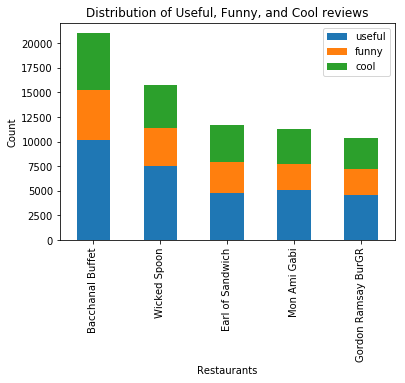

In [21]:
b_ids = df['business_id'].unique()
restaurants = pd.read_csv('restaurants.csv')
names = restaurants[restaurants['id'].isin(b_ids)]
data = pd.merge(df, names, left_on=['business_id'], right_on = ['id'], how = 'inner')
data = data.groupby('name')['useful', 'funny', 'cool'].sum()
data['total'] = data.sum(axis=1)
data.sort_values(by='total', ascending=False, inplace=True)
ax = data.iloc[:,:-1].plot(kind='bar', stacked=True)
ax.set_title('Distribution of Useful, Funny, and Cool reviews')
ax.set_xlabel('Restaurants')
ax.set_ylabel('Count')

In [80]:
## print all users to 
l = df['user_id'].unique()
print(len(l))
with open("temp.txt","w") as outfile:
    for item in l:
        outfile.write("\'%s\',\n"% item)

18591


In [67]:
df['user_id'].unique().shape

(18591,)

In [63]:
mon_users['id'].unique().shape

(579,)

In [113]:
### read all user data
all_users = pd.read_csv("top_rated_res_user.csv", sep = ",")
all_users.shape
users = all_users.drop(['id', 'name', 'yelping_since'], axis=1)
users[users['review_count'] > 5000]

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
2840,7764,123,139,113,272,3.49,36,23,7,4,14,137,219,97,97,67,78
7485,5344,3905,3876,3847,397,3.93,2104,183,246,113,232,1028,6677,3624,3624,1165,338
7807,8353,22628,19263,19369,417,3.58,1294,379,252,19,39,708,2312,1797,1797,933,819
17081,6653,1444,1142,1167,237,3.32,92,39,12,2,1,208,496,288,288,78,89


## Clustering analysis to find outlying users across 5 most reviewed restaurants

In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

x = users.values
scaler = StandardScaler()
# x = scaler.fit_transform(x)
kmeans = KMeans(n_clusters=2, random_state=1).fit(x)
pred = kmeans.predict(x)
print(set(pred))
print("cluster = 0", len(pred[np.where(pred == 0)[0]]) )
print("cluster = 1", len(pred[np.where(pred == 1)[0]]) )
# we see that the class 1 are outliers

{0, 1}
cluster = 0 18525
cluster = 1 66


In [158]:
## analysing outliers in detail
outliers = np.where(pred == 1)[0]
users.iloc[outliers,:].tail()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
17383,558,24535,10353,18462,183,3.55,266,51,15,5,6,571,777,718,718,335,318
17580,3253,48621,29166,38033,1266,3.42,2832,315,348,126,220,2968,11276,5481,5481,1251,451
17662,761,17478,17469,17413,196,4.44,2982,254,506,317,166,1073,2951,3326,3326,1399,2700
17756,672,17608,17329,17569,63,3.47,315,22,11,1,5,164,916,625,625,115,16
17809,2159,24482,24027,25391,567,3.83,18812,1013,1543,1443,357,3038,6724,11404,11404,4222,6771


In [208]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_red = pca.fit_transform(x)
print("Variance Explained :", np.sum(pca.explained_variance_ratio_), pca.explained_variance_ratio_)

Variance Explained : 0.9629267095396818 [0.93079208 0.03213463]


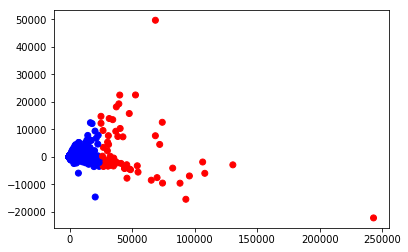

In [160]:
color = ['r' if c == 1 else 'b' for c in pred]
plt.scatter(x = x_red[:,0], y = x_red[:,1], c= color)

In [348]:
x = users.values
scaler = StandardScaler()
x = scaler.fit_transform(x)
dbscan = DBSCAN(min_samples=20, eps = 0.01, metric="cosine").fit(x)
pred = dbscan.fit_predict(x)
print(set(pred))
print("cluster = 0", len(pred[np.where(pred == 0)[0]]) )
print("cluster = 1", len(pred[np.where(pred == 1)[0]]) )
print("cluster = -1", len(pred[np.where(pred == -1)[0]]) )

{0, -1}
cluster = 0 12982
cluster = 1 0
cluster = -1 5609


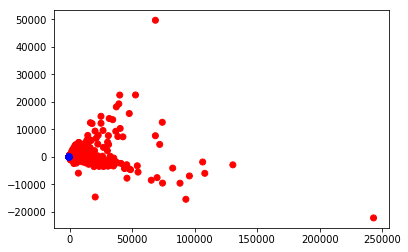

In [349]:
# print(list(pred))
color = ['r' if c == -1 else 'b' for c in pred]
plt.scatter(x = x_red[:,0], y = x_red[:,1], c= color)

In [267]:
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components = 2, metric = 'cosine', n_iter = 250)
# x_red = tsne.fit_transform(x)
# print("divergence :",kl_divergence_)

In [352]:
# color = ['r' if c == -1 else 'b' for c in pred]
# plt.scatter(x = x_red[:,0], y = x_red[:,1], c= color)
outliers = np.where(pred == -1)[0]
users.iloc[outliers,:].head()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
594,1003,41650,41704,41701,303,4.28,12390,761,1183,1101,411,2339,6790,10234,10234,2555,11987
1252,508,11021,9929,10816,137,4.04,3237,511,761,287,239,973,3955,3317,3317,2099,6022
1426,392,3920,2333,2726,57,3.72,1420,680,1088,306,363,1111,1457,1778,1778,1020,2077
1802,497,50339,50249,50254,474,4.10,10452,382,565,301,66,2237,4618,9489,9489,2634,9688
2593,398,56068,55986,55916,243,3.74,1811,565,337,32,23,630,3888,4047,4047,1928,1268


In [350]:
x = users.values
scaler = StandardScaler()
x = scaler.fit_transform(x)
dbscan = DBSCAN(min_samples=5, eps = 40, metric="manhattan").fit(x)
pred = dbscan.fit_predict(x)
print(set(pred))
print("cluster = 0", len(pred[np.where(pred == 0)[0]]) )
print("cluster = 1", len(pred[np.where(pred == 1)[0]]) )
print("cluster = -1", len(pred[np.where(pred == -1)[0]]) )

{0, -1}
cluster = 0 18556
cluster = 1 0
cluster = -1 35


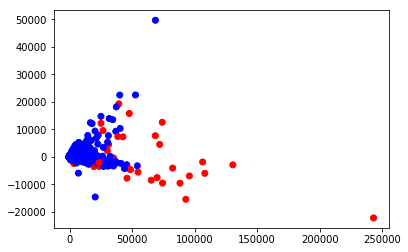

In [351]:
# print(list(pred))
color = ['r' if c == -1 else 'b' for c in pred]
plt.scatter(x = x_red[:,0], y = x_red[:,1], c= color)